In [ ]:
!wget https://cernbox.cern.ch/index.php/s/hqz8zE7oxyPjvsL/download -O data.tar
!tar -xvf data.tar

--2022-03-29 09:02:08--  https://cernbox.cern.ch/index.php/s/hqz8zE7oxyPjvsL/download
Resolving cernbox.cern.ch (cernbox.cern.ch)... 128.142.53.28, 137.138.120.151, 128.142.53.35, ...
Connecting to cernbox.cern.ch (cernbox.cern.ch)|128.142.53.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘data.tar’

data.tar                [  <=>               ] 690.93M  11.8MB/s    in 64s     

2022-03-29 09:03:15 (10.8 MB/s) - ‘data.tar’ saved [724495360]

QCDToGGQQ_IMGjet_RH1all_jet0_run0_n36272.test.snappy.parquet
QCDToGGQQ_IMGjet_RH1all_jet0_run1_n47540.test.snappy.parquet
QCDToGGQQ_IMGjet_RH1all_jet0_run2_n55494.test.snappy.parquet


In [2]:
import os
import pyarrow.parquet as pq
import pyarrow
from tqdm import tqdm
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 


os.listdir()

['.config',
 'QCDToGGQQ_IMGjet_RH1all_jet0_run2_n55494.test.snappy.parquet',
 'data.tar',
 'dataset',
 'QCDToGGQQ_IMGjet_RH1all_jet0_run0_n36272.test.snappy.parquet',
 'QCDToGGQQ_IMGjet_RH1all_jet0_run1_n47540.test.snappy.parquet',
 'sample_data']

In [ ]:
table2 = pq.read_table('QCDToGGQQ_IMGjet_RH1all_jet0_run2_n55494.test.snappy.parquet')
table2 = None

In [ ]:
table2 = pq.  ('QCDToGGQQ_IMGjet_RH1all_jet0_run1_n47540.test.snappy.parquet')
table2 = None

In [ ]:
table2 = pq.read_table('QCDToGGQQ_IMGjet_RH1all_jet0_run0_n36272.test.snappy.parquet')

In [42]:
print(table2.column_names)

['X_jets', 'pt', 'm0', 'y']


In [ ]:
print(len(table2['X_jets']))
print(len(table2['pt']))
print(len(table2['m0']))
print(len(table2['y']))

36272
36272
36272
36272


In [ ]:
def getNRandomValues(N, range):
    r = np.arange(range)
    r = np.random.permutation(r)
    return list(r[:N])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


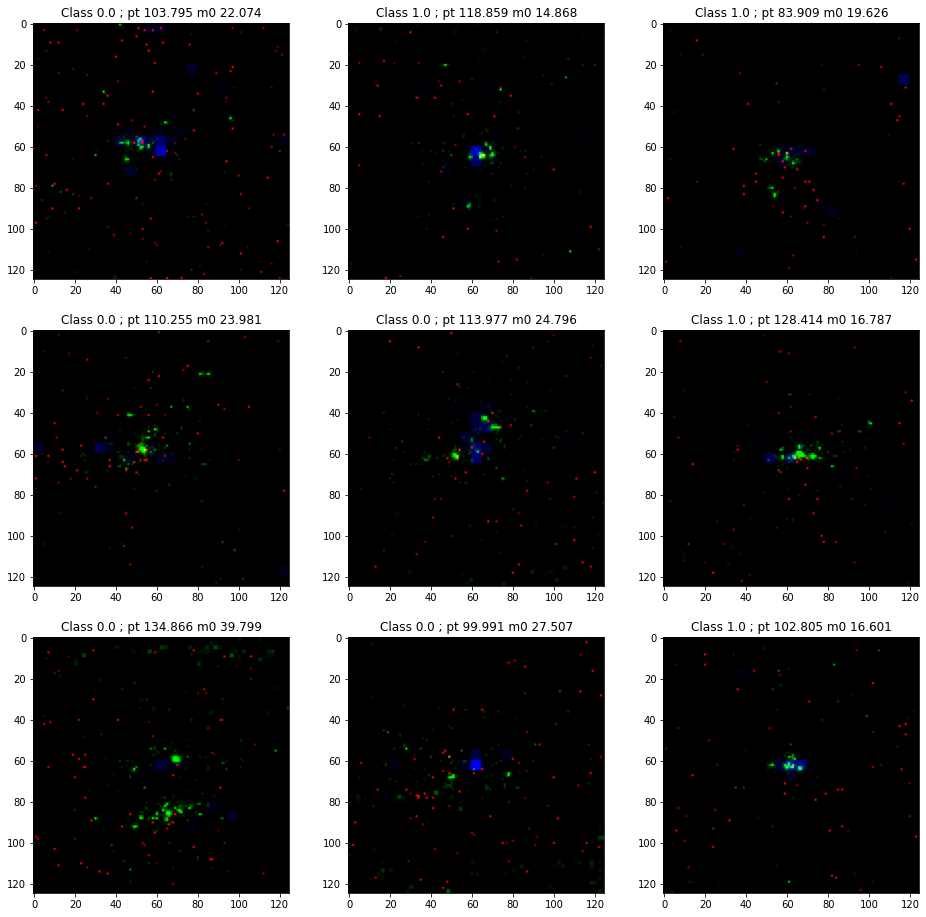

In [41]:

plt.figure(figsize=(16,16))

for i, j in enumerate(getNRandomValues(9, len(table2['y']))):
  plt.subplot(3, 3, i + 1)
  v = np.array(table2['X_jets'][j].as_py()).transpose(1, 2, 0)
  plt.imshow(v)
  plt.title(f"Class {round(table2['y'][j].as_py(), 3)} ; pt {round(table2['pt'][j].as_py(), 3) } m0 {round(table2['m0'][j].as_py(), 3)}")  

In [ ]:
# Runtime is quite limited by the RAM, get the data from parquet file
# and save it to folders
counter = 0

def parquet_to_folders(parquet_filepath):
  global counter 
  table = pq.read_table(parquet_filepath)

  ['X_jets', 'pt', 'm0', 'y']
  
  qpath = os.path.join("dataset", "quark")
  gpath = os.path.join("dataset", "gluon")
  class_to_path = [qpath, gpath]

  try: 
    os.mkdir("dataset")
  except FileExistsError:
    pass

  try: 
    os.mkdir(qpath)
  except FileExistsError:
    pass
  
  try: 
    os.mkdir(gpath)
  except FileExistsError:
    pass
  
  l = len(table['X_jets'])
  for _ in range(l):


    counter += 1
  
  # memory cleanup
  table = None


[2327, 24044, 31127, 13819, 35201, 4724, 4174, 26335, 26408]

In [3]:

counter = 0

  
def parquetToStructuredFolder(parquet_filepath, dataset_path="dataset"):
  global counter
  print("Reading file")
  table = pq.read_table(parquet_filepath)

  qpath = os.path.join("dataset", "quark")
  gpath = os.path.join("dataset", "gluon")
  class_to_path = [qpath, gpath]

  print("Creating folder structure")
  try: 
    os.mkdir(dataset_path)
  except FileExistsError:
    pass

  try: 
    os.mkdir(qpath)
  except FileExistsError:
    pass
    
  try: 
    os.mkdir(gpath)
  except FileExistsError:
    pass
    
  l = len(table['X_jets'])
  indexes = []

  for _ in tqdm(range(l)):
    img, label = np.array(table["X_jets"][counter].as_py(), dtype='float').transpose(1, 2, 0), table['y'][counter].as_py()
    path = class_to_path[int(label)]
    tf.keras.utils.save_img(os.path.join(path, f"{counter}.bmp"), img)
    indexes.append(counter)
    counter += 1


parquetToStructuredFolder('QCDToGGQQ_IMGjet_RH1all_jet0_run1_n47540.test.snappy.parquet')

Reading file
Creating folder structure


100%|██████████| 47540/47540 [21:28<00:00, 36.88it/s]


In [5]:
bs = 32
dataset_folder = "dataset"
train_ds = tf.keras.utils.image_dataset_from_directory(dataset_folder, validation_split=0.1, subset="training", seed=123, image_size=(125, 125),batch_size=bs)

Found 47540 files belonging to 2 classes.
Using 42786 files for training.
